# EDA Netflix

## Import Library
import library yang dibutuhkan


In [1]:
#import pandas
import pandas as pd



#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import btext
import btext as bt

from datetime import datetime

from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

from bokeh.io import output_notebook, show, reset_output
from bokeh.plotting import figure
from bokeh.models import HoverTool

import numpy as np


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

print(pd.__version__)

1.2.2


## Load Data
Data yang digunakan berasal dari Kaggle.com dalam bentuk CSV. Kemudian ditampilkan secara keseluruhan. CSV yang di read ditampung dalam variable df

In [3]:
df=pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Karakteristik Data
menggunakan df.dtypes untuk melihat tipe data dari setiap kolom yang ada pada dataset

### Tipe Data

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Dimensi
Dengan menggunakan df.shape, melihat dimensi dari dataset. Dataset memiliki 7787 baris dan 12 kolom

In [5]:
df.shape

(7787, 12)

## Data Cleaning
Data cleaning bertujuan agar dataset yang akan kita gunakan sudah bersih dari nilai null. Sehingga, eksplorasi akan menampilkan hasil yang lebih baik.

### Menghitung Nilai Null
dengan menggunakan .isna() digunakan untuk mendeteksi nilai dari setiap cell yang null. Jika cell berisi tulisan 'kosong' = tidak null

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Drop Baris Null
Dengan menggunakan dropna() akan menghapus setiap baris yang mengandung nilai null. jika ingin menghapus kolom, gunakan .dropna(axis='column')

In [7]:
df = df.dropna(axis='rows')

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Dimensi Setelah Cleaning
setelah dibersihkan dimensi dataset menjadi 4808 baris dan 12 kolom

In [9]:
df.shape

(4808, 12)

In [10]:
df.count()

show_id         4808
type            4808
title           4808
director        4808
cast            4808
country         4808
date_added      4808
release_year    4808
rating          4808
duration        4808
listed_in       4808
description     4808
dtype: int64

## Perubahan Tipe Data 
Melakukan perubahan tipe data pada kolom date_added. Tipe data kolom date_added diubah karena bentuknya object dan tidak bisa dipanggil tahunnya saja, karena data frame akan dibatasi untuk date_addednya hingga 2021

In [11]:
df.date_added = pd.to_datetime(df.date_added)
df.release_year = pd.to_datetime(df.release_year, format='%Y')

In [12]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016-01-01,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011-01-01,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009-01-01,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016-01-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [14]:
df['release_year']=df['release_year'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


## Pembatasan Data

### Data sebelum dibatasi

melihat tahun rilis terbaru

In [15]:
df.release_year.max()

2021

menampilkan tayangan dengan tahun rilis 2021

In [16]:
df.loc[df['release_year']==2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands",2021-01-08,2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."
6477,s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,2021-01-08,2021,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."


melihat tahun rilis terlama

In [17]:
df.release_year.min()

1942

menampilkan tayangan dengan tahun rilis 1942

In [18]:
df.loc[df['release_year']==1942]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6117,s6118,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


### Menghitung Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun Rilis

In [19]:
df['release_year'].value_counts()

2017    645
2018    624
2016    562
2019    488
2020    379
       ... 
1966      1
1942      1
1945      1
1964      1
1946      1
Name: release_year, Length: 71, dtype: int64

### Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun Rilis dalam Grafik

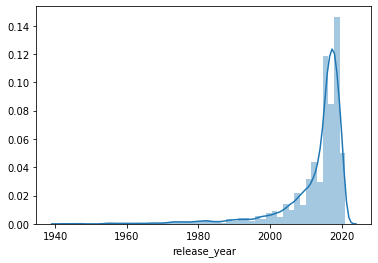

In [20]:
sns.distplot(df['release_year'])

### Menghitung Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun ditambahkan ke Netflix

In [21]:
df['date_added'].dt.year.value_counts()

2019    1337
2020    1229
2018    1114
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2008       1
2010       1
Name: date_added, dtype: int64

### Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun ditambahkan ke Netflix dalam Grafik

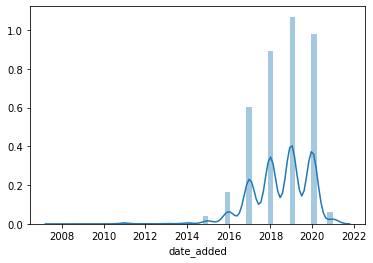

In [22]:
sns.distplot(df['date_added'].dt.year)

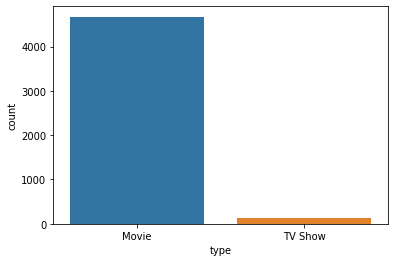

In [23]:
sns.countplot(df['type'])

In [24]:
df['type'].value_counts()

Movie      4673
TV Show     135
Name: type, dtype: int64

In [25]:
df['country'].value_counts()


United States                                             1653
India                                                      832
United Kingdom                                             174
Canada                                                     104
Egypt                                                       87
                                                          ... 
Germany, Australia                                           1
United Kingdom, Spain, United States                         1
United States, Nicaragua                                     1
United Kingdom, Czech Republic, Germany, United States       1
Canada, Japan, United States                                 1
Name: country, Length: 544, dtype: int64

### Melihat Data yang ditambahkan pada Tahun 2021

In [26]:
df.loc[df['date_added'].dt.year == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,2021-01-07,2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,2009,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
104,s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,2021-01-01,2011,R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,2016,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b..."
493,s494,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,2021-01-13,2017,R,71 min,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...
...,...,...,...,...,...,...,...,...,...,...,...,...
7145,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,2021-01-06,2020,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...
7351,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States",2021-01-01,2011,PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."


menghitung berapa banyak tayangan yang ditambahkan pada tahun 2021

In [27]:
(df['date_added'].dt.year == 2021).value_counts()


False    4730
True       78
Name: date_added, dtype: int64

### Membatasi Data 5 Tahun Terakhir
data tahun yang diambil adalah tahun ditambahkannya film atau TV show tersebut ke Netflix, maksimal di 2020

In [28]:
th2021_da = df[df['date_added'].dt.year == 2021].index
df.drop(th2021_da, inplace=True)
th2021_da


Int64Index([  57,   72,  104,  205,  493,  560,  601,  692, 1002, 1004, 1041,
            1194, 1232, 1242, 1285, 1426, 1497, 1673, 1690, 1739, 1832, 1919,
            2013, 2248, 2269, 2310, 2349, 2413, 2476, 2479, 2493, 2505, 2692,
            2799, 3034, 3062, 3093, 3237, 3390, 3521, 3544, 3558, 3709, 3848,
            4007, 4269, 4372, 4786, 4813, 4854, 4881, 5059, 5138, 5322, 5520,
            5521, 5563, 5770, 5849, 5906, 5918, 5954, 6080, 6203, 6247, 6288,
            6396, 6444, 6477, 6500, 6697, 6769, 6975, 7145, 7351, 7551, 7569,
            7570],
           dtype='int64')

In [29]:
(df['date_added'].dt.year == 2021).value_counts()

False    4730
Name: date_added, dtype: int64

In [30]:
df.loc[df['date_added'].dt.year == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Data 2016-2020
data dari 2016 sampai dengan 2020 dimasukkan kedalam variable fiveyearadded

In [31]:
fiveyearadded = df.loc[df['date_added'].dt.year > 2015]
fiveyearadded = fiveyearadded.reset_index(drop=True)
fiveyearadded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
4634,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
4635,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
4636,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
4637,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


### Memastikan Tahun
memastikan data hanya sampai 2020, release year sudah pasti tidak ada yang 2021 karena tidak mungkin film rilis 2021 ditambahkan di Netflix tahun 2020

In [32]:
fiveyearadded.loc[fiveyearadded['release_year'] == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [33]:
fiveyearadded['date_added']=fiveyearadded['date_added'].dt.year
fiveyearadded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [34]:
fiveyearadded.shape

(4639, 12)

## Jumlah Tiap Tahun Berdasarkan date_added

In [114]:
fiveyearadded['date_added'].value_counts()

2019    1337
2020    1229
2018    1114
2017     752
2016     207
Name: date_added, dtype: int64

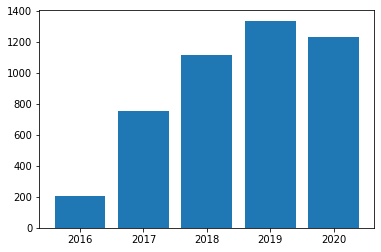

In [115]:
totaltahun = fiveyearadded.groupby(['date_added']).count()
totaltahun = totaltahun.filter(['show_id'])
totaltahun.columns = ['count']
pd.DataFrame(totaltahun)
plt.bar(totaltahun.index, totaltahun['count'])
plt.show()


In [118]:
count2016 = fiveyearadded[fiveyearadded['date_added'] == 2016]
# count2016
countNegara2016 = count2016['country']
countNegara2016 = Counter(", ".join(countNegara2016).split(", ")).most_common()
countNegara2016

[('United States', 111),
 ('United Kingdom', 20),
 ('France', 15),
 ('Canada', 13),
 ('Spain', 11),
 ('India', 10),
 ('Mexico', 9),
 ('Japan', 8),
 ('Germany', 6),
 ('Australia', 6),
 ('Netherlands', 4),
 ('Belgium', 4),
 ('China', 4),
 ('Hong Kong', 4),
 ('Denmark', 3),
 ('Argentina', 3),
 ('South Africa', 2),
 ('Peru', 2),
 ('Pakistan', 2),
 ('Greece', 2),
 ('Ireland', 2),
 ('Chile', 2),
 ('Italy', 2),
 ('Israel', 2),
 ('South Korea', 1),
 ('New Zealand', 1),
 ('Brazil', 1),
 ('Qatar', 1),
 ('Norway', 1),
 ('Nigeria', 1),
 ('Hungary', 1),
 ('Sweden', 1),
 ('Croatia', 1),
 ('Slovenia', 1),
 ('Serbia', 1),
 ('Montenegro', 1),
 ('United Arab Emirates', 1),
 ('Jordan', 1)]

In [112]:
countNegara2016 = pd.DataFrame(countNegara2016)
countNegara2016

,0,1
0,United States,111
1,United Kingdom,20
2,France,15
3,Canada,13
4,Spain,11
5,India,10
6,Mexico,9
7,Japan,8
8,Germany,6
9,Australia,6


In [108]:
count2017 = fiveyearadded[fiveyearadded['date_added'] == 2017]
countNegara2017 = count2017['country']
countNegara2017 = Counter(", ".join(countNegara2017).split(", ")).most_common()
countNegara2017

[('United States', 308),
 ('India', 141),
 ('United Kingdom', 69),
 ('Canada', 49),
 ('France', 44),
 ('Spain', 36),
 ('Turkey', 35),
 ('Germany', 28),
 ('Mexico', 25),
 ('Japan', 21),
 ('Belgium', 18),
 ('China', 16),
 ('Brazil', 15),
 ('Argentina', 15),
 ('South Korea', 11),
 ('Australia', 11),
 ('Hong Kong', 8),
 ('Sweden', 7),
 ('Italy', 7),
 ('Netherlands', 6),
 ('Norway', 5),
 ('Switzerland', 5),
 ('Chile', 5),
 ('Pakistan', 5),
 ('Malaysia', 5),
 ('Ireland', 4),
 ('Qatar', 4),
 ('Russia', 3),
 ('South Africa', 3),
 ('Denmark', 3),
 ('United Arab Emirates', 3),
 ('Czech Republic', 3),
 ('Israel', 3),
 ('Singapore', 2),
 ('Bulgaria', 2),
 ('Austria', 2),
 ('New Zealand', 2),
 ('Jordan', 2),
 ('Cambodia', 2),
 ('Lebanon', 2),
 ('Soviet Union', 2),
 ('Uruguay', 2),
 ('Portugal', 1),
 ('Colombia', 1),
 ('Saudi Arabia', 1),
 ('Vietnam', 1),
 ('Iceland', 1),
 ('Sri Lanka', 1),
 ('Poland', 1),
 ('Finland', 1),
 ('Latvia', 1),
 ('Venezuela', 1),
 ('Nicaragua', 1),
 ('Thailand', 1),
 ('In

In [109]:
countNegara2017 = pd.DataFrame(countNegara2017)
countNegara2017

,0,1
0,United States,308
1,India,141
2,United Kingdom,69
3,Canada,49
4,France,44
...,...,...
64,Peru,1
65,Panama,1
66,Nigeria,1
67,Romania,1


In [105]:
count2018 = fiveyearadded[fiveyearadded['date_added'] == 2018]
countNegara2018 = count2018['country']
countNegara2018 = Counter(", ".join(countNegara2018).split(", ")).most_common()
countNegara2018

[('United States', 403),
 ('India', 328),
 ('United Kingdom', 98),
 ('Canada', 60),
 ('Hong Kong', 55),
 ('France', 44),
 ('China', 32),
 ('Spain', 31),
 ('Indonesia', 27),
 ('Germany', 27),
 ('Australia', 27),
 ('Thailand', 26),
 ('Argentina', 21),
 ('Japan', 18),
 ('Mexico', 18),
 ('South Korea', 15),
 ('Belgium', 12),
 ('South Africa', 10),
 ('Brazil', 10),
 ('Ireland', 10),
 ('Chile', 9),
 ('Italy', 8),
 ('Denmark', 8),
 ('Netherlands', 8),
 ('Singapore', 7),
 ('Sweden', 7),
 ('United Arab Emirates', 6),
 ('Colombia', 6),
 ('Israel', 6),
 ('Poland', 5),
 ('Pakistan', 5),
 ('Philippines', 5),
 ('New Zealand', 4),
 ('Turkey', 4),
 ('Bulgaria', 4),
 ('Switzerland', 4),
 ('Luxembourg', 3),
 ('Serbia', 3),
 ('Morocco', 3),
 ('Norway', 2),
 ('Iceland', 2),
 ('Taiwan', 2),
 ('Iran', 2),
 ('Qatar', 2),
 ('Vietnam', 2),
 ('Malaysia', 2),
 ('Peru', 2),
 ('Portugal', 2),
 ('Hungary', 2),
 ('Czech Republic', 2),
 ('Uruguay', 1),
 ('Soviet Union', 1),
 ('Bangladesh', 1),
 ('Russia', 1),
 ('Alba

In [106]:
countNegara2018 = pd.DataFrame(countNegara2018)
countNegara2018

,0,1
0,United States,403
1,India,328
2,United Kingdom,98
3,Canada,60
4,Hong Kong,55
...,...,...
65,Somalia,1
66,Kenya,1
67,Sudan,1
68,Slovenia,1


In [85]:
count2019 = fiveyearadded[fiveyearadded['date_added'] == 2019]
countNegara2019 = count2019['country']
countNegara2019 = Counter(", ".join(countNegara2019).split(", ")).most_common()
countNegara2019

[('United States', 652),
 ('India', 220),
 ('United Kingdom', 125),
 ('France', 63),
 ('Canada', 53),
 ('Egypt', 44),
 ('Philippines', 39),
 ('Spain', 37),
 ('Germany', 37),
 ('Japan', 30),
 ('Nigeria', 29),
 ('China', 25),
 ('Hong Kong', 20),
 ('Turkey', 20),
 ('Mexico', 19),
 ('Indonesia', 18),
 ('Australia', 18),
 ('Italy', 18),
 ('South Korea', 18),
 ('Belgium', 15),
 ('Poland', 12),
 ('Brazil', 12),
 ('Denmark', 9),
 ('Argentina', 9),
 ('Taiwan', 9),
 ('Thailand', 8),
 ('South Africa', 8),
 ('Pakistan', 8),
 ('United Arab Emirates', 8),
 ('Singapore', 7),
 ('Netherlands', 7),
 ('Romania', 6),
 ('Colombia', 6),
 ('Malaysia', 6),
 ('Sweden', 5),
 ('Israel', 4),
 ('Uruguay', 4),
 ('Luxembourg', 4),
 ('New Zealand', 4),
 ('Switzerland', 4),
 ('Czech Republic', 4),
 ('Ireland', 3),
 ('Austria', 3),
 ('Finland', 2),
 ('Bulgaria', 2),
 ('Chile', 2),
 ('Peru', 2),
 ('Bangladesh', 2),
 ('Norway', 2),
 ('Ghana', 2),
 ('Hungary', 2),
 ('Iran', 1),
 ('Iceland', 1),
 ('Senegal', 1),
 ('Russia'

In [86]:
countNegara2019 = pd.DataFrame(countNegara2019)
countNegara2019

,0,1
0,United States,652
1,India,220
2,United Kingdom,125
3,France,63
4,Canada,53
...,...,...
63,Nepal,1
64,Vatican City,1
65,Morocco,1
66,Malawi,1


In [88]:
count2020 = fiveyearadded[fiveyearadded['date_added'] == 2020]
countNegara2020 = count2020['country']
countNegara2020 = Counter(", ".join(countNegara2020).split(", ")).most_common()
countNegara2020

[('United States', 577),
 ('India', 180),
 ('United Kingdom', 102),
 ('Canada', 76),
 ('France', 75),
 ('Egypt', 49),
 ('Germany', 40),
 ('Nigeria', 37),
 ('Philippines', 32),
 ('Japan', 31),
 ('Spain', 28),
 ('Indonesia', 27),
 ('Turkey', 24),
 ('China', 21),
 ('Italy', 20),
 ('Belgium', 20),
 ('South Africa', 18),
 ('Mexico', 17),
 ('Lebanon', 16),
 ('South Korea', 15),
 ('Brazil', 14),
 ('United Arab Emirates', 13),
 ('Australia', 12),
 ('Taiwan', 10),
 ('Argentina', 10),
 ('Poland', 9),
 ('Thailand', 7),
 ('Hong Kong', 6),
 ('Malaysia', 6),
 ('Netherlands', 6),
 ('Saudi Arabia', 6),
 ('Ireland', 5),
 ('New Zealand', 5),
 ('Norway', 5),
 ('Kenya', 4),
 ('Romania', 4),
 ('Kuwait', 4),
 ('Czech Republic', 4),
 ('Russia', 4),
 ('Iceland', 3),
 ('Uruguay', 3),
 ('Colombia', 3),
 ('Switzerland', 3),
 ('Luxembourg', 3),
 ('Chile', 3),
 ('Serbia', 2),
 ('Algeria', 2),
 ('Singapore', 2),
 ('Ghana', 2),
 ('Malta', 2),
 ('Hungary', 2),
 ('Sweden', 2),
 ('Jordan', 2),
 ('Greece', 2),
 ('Austri

In [94]:
countNegara2020 = pd.DataFrame(countNegara2020)
countNegara2020

,0,1
0,United States,577
1,India,180
2,United Kingdom,102
3,Canada,76
4,France,75
...,...,...
64,Jamaica,1
65,Finland,1
66,Bulgaria,1
67,East Germany,1


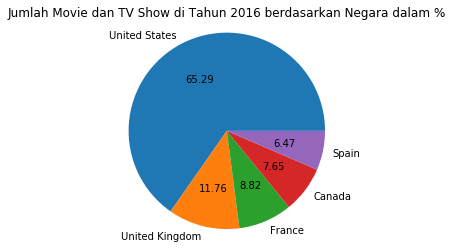

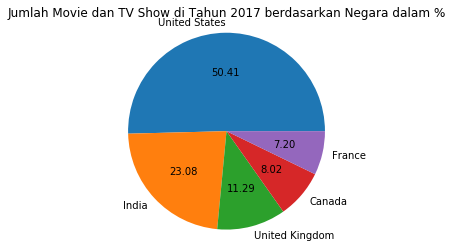

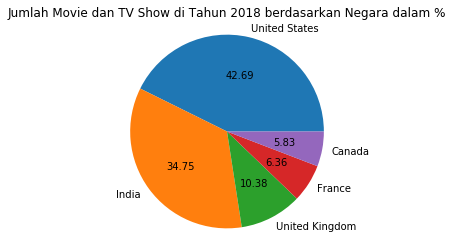

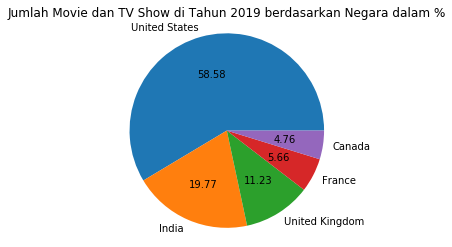

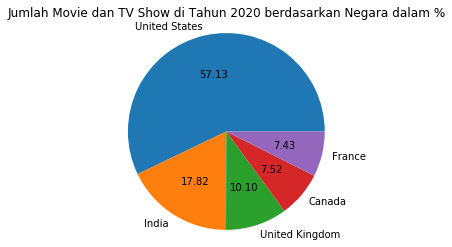

In [113]:
persentase1 = countNegara2016[1].head()
label= countNegara2016[0].head()
plt.title('Jumlah Movie dan TV Show di Tahun 2016 berdasarkan Negara dalam %')
plt.pie((persentase1), labels=label, autopct='%.2f')
plt.axis('equal')
plt.show()

persentase2 = countNegara2017[1].head()
label= countNegara2017[0].head()
plt.title('Jumlah Movie dan TV Show di Tahun 2017 berdasarkan Negara dalam %')
plt.pie((persentase2), labels=label, autopct='%.2f')
plt.axis('equal')
plt.show()

persentase3 = countNegara2018[1].head()
label= countNegara2019[0].head()
plt.title('Jumlah Movie dan TV Show di Tahun 2018 berdasarkan Negara dalam %')
plt.pie((persentase3), labels=label, autopct='%.2f')
plt.axis('equal')
plt.show()

persentase4 = countNegara2019[1].head()
label= countNegara2019[0].head()
plt.title('Jumlah Movie dan TV Show di Tahun 2019 berdasarkan Negara dalam %')
plt.pie((persentase4), labels=label, autopct='%.2f')
plt.axis('equal')
plt.show()

persentase5 = countNegara2020[1].head()
label= countNegara2020[0].head()
plt.title('Jumlah Movie dan TV Show di Tahun 2020 berdasarkan Negara dalam %')
plt.pie((persentase5), labels=label, autopct='%.2f')
plt.bar(x=p)
plt.axis('equal')
plt.show()


## Rating

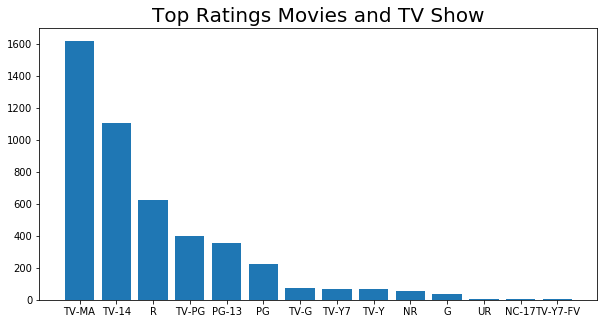

In [42]:
top_ratings = fiveyearadded.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
top_ratings
fig_size = (10,5)
fig, ax = plt.subplots(figsize=fig_size)  
# # sns.pointplot(x='rating',y='count',data=top_ratings)
plt.bar(top_ratings['rating'], top_ratings['count'])
plt.title('Top Ratings Movies and TV Show',size='20')
plt.show()

In [43]:
fiveyearadded['rating'].value_counts()

TV-MA       1621
TV-14       1108
R            626
TV-PG        402
PG-13        354
PG           223
TV-G          74
TV-Y7         67
TV-Y          65
NR            55
G             35
UR             5
TV-Y7-FV       2
NC-17          2
Name: rating, dtype: int64

In [44]:
netflix_movies = fiveyearadded.loc[fiveyearadded['type'] == 'Movie']
netflix_tvshow = fiveyearadded.loc[fiveyearadded['type'] == 'TV Show']

netflix_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [45]:
netflix_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
90,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019,2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
146,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020,2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...
173,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,2018,2018,TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...
189,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020,2019,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...


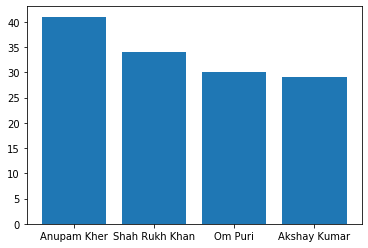

In [46]:
most_common_cast = Counter(", ".join(netflix_movies['cast']).split(", ")).most_common(4)

labls = [i[0] for i in most_common_cast]
jml = [i[1] for i in most_common_cast]

plt.bar(labls, jml)
plt.show()

In [80]:
df.loc[df.description.str.contains('Twenty-six years', na=False)]
# testing = df.loc[df['show_id']=='s92']
# testing['description']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
91,s92,Movie,26 Years,Geun-hyun Cho,"Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...",South Korea,2017-10-01,2012,TV-MA,135 min,"Dramas, International Movies, Thrillers",Twenty-six years after the 1980 massacre at Gw...


In [48]:
Counter(", ".join(netflix_movies['cast']).split(", ")).most_common(10)


[('Anupam Kher', 41),
 ('Shah Rukh Khan', 34),
 ('Om Puri', 30),
 ('Akshay Kumar', 29),
 ('Naseeruddin Shah', 28),
 ('Amitabh Bachchan', 27),
 ('Paresh Rawal', 27),
 ('Boman Irani', 26),
 ('Kareena Kapoor', 25),
 ('Kay Kay Menon', 19)]

In [49]:
# set(pisah(netflix_movies['listed_in']))
set(", ".join(netflix_movies['listed_in']).split(", "))


{'Action & Adventure',
 'Anime Features',
 'Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Romantic Movies',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Stand-Up Comedy',
 'Thrillers'}

In [50]:
# Counter(pisah(netflix_movies['listed_in'])).most_common()
Counter(", ".join(netflix_movies['listed_in']).split(", ")).most_common()


[('International Movies', 2151),
 ('Dramas', 1977),
 ('Comedies', 1353),
 ('Action & Adventure', 678),
 ('Independent Movies', 650),
 ('Romantic Movies', 502),
 ('Thrillers', 466),
 ('Children & Family Movies', 421),
 ('Documentaries', 354),
 ('Horror Movies', 295),
 ('Stand-Up Comedy', 262),
 ('Music & Musicals', 256),
 ('Sci-Fi & Fantasy', 205),
 ('Sports Movies', 138),
 ('Classic Movies', 90),
 ('LGBTQ Movies', 72),
 ('Anime Features', 55),
 ('Cult Movies', 53),
 ('Faith & Spirituality', 50),
 ('Movies', 20)]

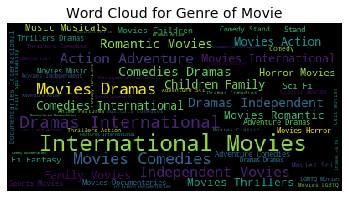

In [51]:
text1 = ", ".join(netflix_movies['listed_in'])
# text3
wordcloud = WordCloud().generate(text1)
# Generate plot
plt.imshow(wordcloud)

plt.axis("off")
plt.title('Word Cloud for Genre of Movie',size='14')
plt.show()

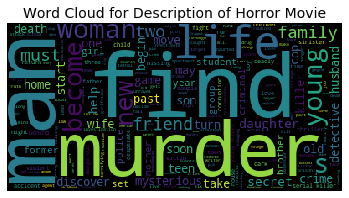

In [52]:
testing = df.loc[df.listed_in.str.contains('Horror Movies' and 'Thrillers')]

text2 = ' '.join(testing['description'])
# text3
wordcloud = WordCloud().generate(text2)
# Generate plot
plt.imshow(wordcloud)

plt.axis("off")
plt.title('Word Cloud for Description of Horror Movie',size='14')
plt.show()

In [53]:
pd.DataFrame(netflix_movies['country'].value_counts())

,country
United States,1523
India,816
United Kingdom,154
Canada,98
Egypt,87
...,...
"France, Iran, United States",1
"United Kingdom, Germany, Canada, United States",1
"United Kingdom, Ireland",1
"Argentina, France",1


In [54]:
netflix_movies['duration'] = netflix_movies['duration'].str.split(' ').str[0]
mov_dur = netflix_movies['duration'].astype(int)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


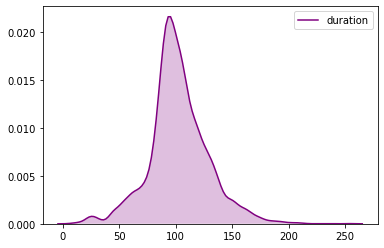

In [55]:

sns.kdeplot(data=mov_dur, shade=True, color= 'purple' )

In [56]:
mov_dur.describe()

count    4511.000000
mean      102.617158
std        26.330653
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

In [57]:
netflix_movies.loc[netflix_movies['duration'] == '8']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
922,s1502,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020,2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


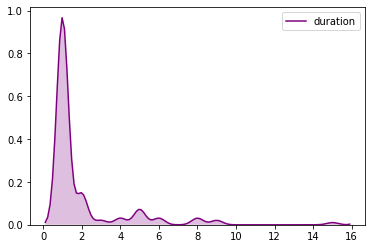

In [58]:
netflix_tvshow['duration'] = netflix_tvshow['duration'].str.split(' ').str[0]
tv_dur = netflix_tvshow['duration'].astype(int)
sns.kdeplot(data=tv_dur, shade=True, color= 'purple' )

In [59]:
tv_dur.describe()

count    128.000000
mean       1.945312
std        2.160157
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       15.000000
Name: duration, dtype: float64

In [60]:
netflix_tvshow.loc[netflix_tvshow['duration'] == '15']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3545,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."


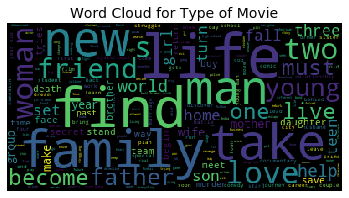

In [61]:
text3 = ', '.join(fiveyearadded['description'])
# text3
wordcloud = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud)

plt.axis("off")
plt.title('Word Cloud for Type of Movie',size='14')
plt.show()


In [62]:
# unique_genre = set()
# for i in netflix_movies['listed_in'] :
#     for x in bt.conslet_tokenized(i, sep = ',') :
#         unique_genre.add(x)
# # unique_genre
# pd.DataFrame(unique_genre)
unik = set(", ".join(netflix_movies['listed_in']).split(", "))
pd.DataFrame(unik)


,0
0,Children & Family Movies
1,Comedies
2,LGBTQ Movies
3,Independent Movies
4,Sci-Fi & Fantasy
5,Dramas
6,Cult Movies
7,Sports Movies
8,International Movies
9,Movies


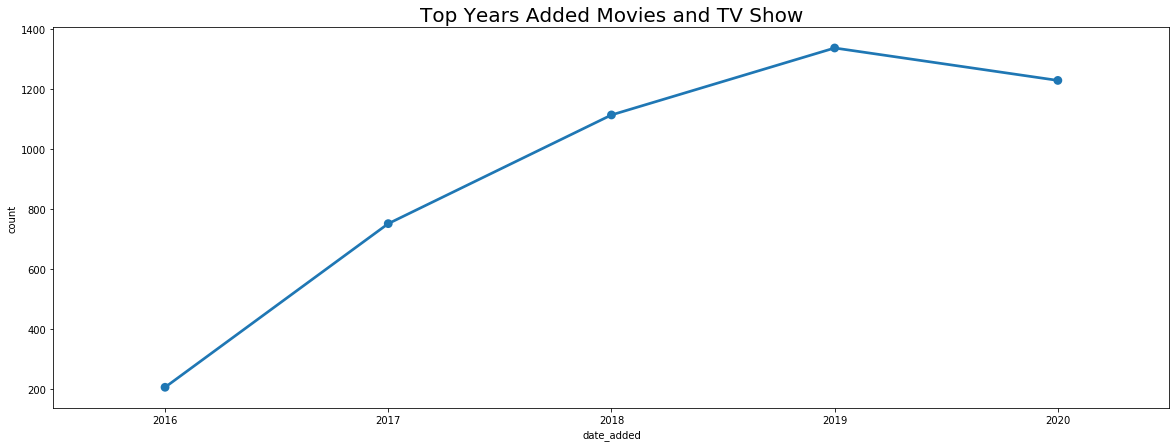

In [63]:
# recent_5yrsA = fiveyearadded[fiveyearadded.date_added > 2015]
top_yearsA = fiveyearadded.groupby(['date_added'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_size = (20,7)
fig, ax = plt.subplots(figsize=fig_size)  
sns.pointplot(x='date_added',y='count',data=top_yearsA)

plt.title('Top Years Added Movies and TV Show',size='20')
plt.show()

In [64]:
df.loc[(df['date_added'] > '2017') & (df['country'] == 'United States')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7758,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,2018-10-01,2008,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...
7771,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,2018-08-10,2018,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...
7774,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [65]:
selected_kolom = ['title','listed_in'] 
fiveyearadded[selected_kolom]

,title,listed_in
0,7:19,"Dramas, International Movies"
1,23:59,"Horror Movies, International Movies"
2,9,"Action & Adventure, Independent Movies, Sci-Fi..."
3,21,Dramas
4,46,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...
4634,Zombieland,"Comedies, Horror Movies"
4635,Zoo,"Dramas, Independent Movies, International Movies"
4636,Zoom,"Children & Family Movies, Comedies"
4637,Zozo,"Dramas, International Movies"


In [66]:
result = []
for _, asd in fiveyearadded.iterrows():
    data = ''
    for i in selected_kolom :
        data += asd[i] + ' '
    data = data [:-1]
    result.append(data)

In [67]:
fiveyearadded['features'] = result
fiveyearadded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,features
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"7:19 Dramas, International Movies"
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","23:59 Horror Movies, International Movies"
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","9 Action & Adventure, Independent Movies, Sci-..."
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,21 Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,"46 International TV Shows, TV Dramas, TV Myste..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"Zombieland Comedies, Horror Movies"
4635,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,"Zoo Dramas, Independent Movies, International ..."
4636,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","Zoom Children & Family Movies, Comedies"
4637,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"Zozo Dramas, International Movies"


In [68]:
fiveyearadded['idx'] = fiveyearadded.index 
fiveyearadded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,features,idx
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"7:19 Dramas, International Movies",0
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","23:59 Horror Movies, International Movies",1
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","9 Action & Adventure, Independent Movies, Sci-...",2
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,21 Dramas,3
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,"46 International TV Shows, TV Dramas, TV Myste...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4634,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"Zombieland Comedies, Horror Movies",4634
4635,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,"Zoo Dramas, Independent Movies, International ...",4635
4636,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","Zoom Children & Family Movies, Comedies",4636
4637,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"Zozo Dramas, International Movies",4637


In [69]:
cm = CountVectorizer().fit_transform(fiveyearadded['features'])

In [70]:
cs = cosine_similarity(cm)
print(cs)

[[1.         0.53033009 0.18898224 ... 0.2236068  0.75       0.61237244]
 [0.53033009 1.         0.26726124 ... 0.31622777 0.53033009 0.4330127 ]
 [0.18898224 0.26726124 1.         ... 0.16903085 0.18898224 0.15430335]
 ...
 [0.2236068  0.31622777 0.16903085 ... 1.         0.2236068  0.18257419]
 [0.75       0.53033009 0.18898224 ... 0.2236068  1.         0.61237244]
 [0.61237244 0.4330127  0.15430335 ... 0.18257419 0.61237244 1.        ]]


In [71]:
cm

<4639x5808 sparse matrix of type '<class 'numpy.int64'>'
	with 29687 stored elements in Compressed Sparse Row format>

In [72]:
cs.shape

(4639, 4639)

In [73]:
title ='The Autopsy of Jane Doe'
show_id = fiveyearadded[fiveyearadded.title == title]['idx'].values[0]

In [74]:
scores = list(enumerate(cs[show_id]))
scores

[(0, 0.2886751345948129),
 (1, 0.5103103630798288),
 (2, 0.3273268353539886),
 (3, 0.0),
 (4, 0.0),
 (5, 0.545544725589981),
 (6, 0.0),
 (7, 0.545544725589981),
 (8, 0.6123724356957946),
 (9, 0.1666666666666667),
 (10, 0.408248290463863),
 (11, 0.4364357804719848),
 (12, 0.35355339059327384),
 (13, 0.14433756729740646),
 (14, 0.35355339059327384),
 (15, 0.4564354645876385),
 (16, 0.2182178902359924),
 (17, 0.2357022603955159),
 (18, 0.2886751345948129),
 (19, 0.6123724356957946),
 (20, 0.2357022603955159),
 (21, 0.408248290463863),
 (22, 0.408248290463863),
 (23, 0.0),
 (24, 0.2886751345948129),
 (25, 0.25819888974716115),
 (26, 0.2357022603955159),
 (27, 0.2357022603955159),
 (28, 0.25819888974716115),
 (29, 0.4811252243246882),
 (30, 0.2182178902359924),
 (31, 0.2886751345948129),
 (32, 0.0),
 (33, 0.25819888974716115),
 (34, 0.3651483716701108),
 (35, 0.3333333333333334),
 (36, 0.2041241452319315),
 (37, 0.0),
 (38, 0.3849001794597505),
 (39, 0.2357022603955159),
 (40, 0.45643546458

In [75]:
urutkan = sorted(scores, key=lambda x:x[1], reverse = True)
urutkan = urutkan[1:]
urutkan

[(3698, 0.769800358919501),
 (3904, 0.769800358919501),
 (3682, 0.7302967433402217),
 (3934, 0.7302967433402217),
 (48, 0.7144345083117603),
 (447, 0.7144345083117603),
 (760, 0.7144345083117603),
 (937, 0.7144345083117603),
 (2199, 0.7144345083117603),
 (3065, 0.7144345083117603),
 (3618, 0.7144345083117603),
 (3828, 0.7144345083117603),
 (4013, 0.7144345083117603),
 (4197, 0.7144345083117603),
 (4356, 0.7144345083117603),
 (1001, 0.6963106238227914),
 (3808, 0.6963106238227914),
 (3847, 0.6943650748294137),
 (3998, 0.6943650748294137),
 (4122, 0.6943650748294137),
 (3677, 0.6735753140545635),
 (4027, 0.6735753140545635),
 (4090, 0.6735753140545635),
 (41, 0.6735753140545634),
 (3859, 0.6735753140545634),
 (88, 0.6546536707079772),
 (1040, 0.6546536707079772),
 (3610, 0.6546536707079772),
 (3580, 0.6495190528383291),
 (4150, 0.6495190528383291),
 (3671, 0.6454972243679029),
 (3718, 0.6454972243679029),
 (3749, 0.6454972243679029),
 (3751, 0.6454972243679029),
 (3766, 0.645497224367902

In [76]:
j=0
print('Most 10 recomended movies and TV Show to', title,'are:\n')
for i in urutkan:
    title = fiveyearadded[fiveyearadded.idx == i[0]]['title'].values[0]
    print(j+1, title + '\n', str(i[1]*100) + "%")
    j=j+1
    if j>9:
        break


Most 10 recomended movies and TV Show to The Autopsy of Jane Doe are:

1 The Boy
 76.98003589195011%
2 The Invitation
 76.98003589195011%
3 The Blackcoat's Daughter
 73.02967433402216%
4 The Last Exorcism
 73.02967433402216%
5 1BR
 71.44345083117602%
6 Backcountry
 71.44345083117602%
7 Cam
 71.44345083117602%
8 Creep 2
 71.44345083117602%
9 Lifechanger
 71.44345083117602%
10 Rattlesnake
 71.44345083117602%


In [77]:
# x = fiveyearadded.groupby(['date_added'])['show_id'].count()
# y = 

# # create a new plot with a title and axis labels
# p = figure(title="Simple line example", x_axis_label="x", y_axis_label="y")

# # add a line renderer with legend and line thickness
# p.line(x, y, legend="Temp.", line_width=2)
# line_plot.add_tools(HoverTool())

# # show the results
# show(p)

In [78]:
def pisah(cols) :
    temp = []
    for i in list(cols) :
        for j in i.split(',') :
            temp.append(bt.conslet(j))
    return temp

most_common_cast = Counter(pisah(fiveyearadded['country'])).most_common(5)
data = pd.DataFrame(most_common_cast)
data

,0,1
0,United States,2051
1,India,879
2,United Kingdom,414
3,Canada,251
4,France,241


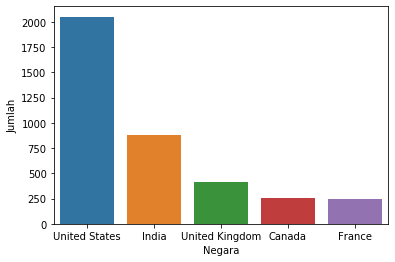

In [79]:
x = data[0]
y = data[1]

plotting = sns.barplot(x=x, y=y)
plotting.set(xlabel="Negara", ylabel = "Jumlah")
plotting